<img src="imagens/Boas Vindas.png">

# Sumário

1) **O que é *Feature Engineering* (Engenharia de Features)**

2) **Criação de Features**

3) **Transformação de Features**

4) **Redução de Dimensionalidade**

<img src="imagens/featureEng.png">

## Parte 1: O que é Feature Engineering?

<img src="imagens/feDefinition.png">

<img src="imagens/feDefinition_02.png">

* A maioria dos algoritmos de aprendizado de máquina, trabalham com dados tabulares.<br>
* Quando falamos de funcionalidades, estamos nos referindo às informações armazenadas nas colunas dessas tabelas.<br><br>

* **Por exemplo**<br>
Se estamos procurando informações sobre casas, os recursos (*Features*) seriam:<br>
  * Metros Quadrados;<br>
  * Número de quartos; <br>
  * Número de salas;<br>
  * Quantidade de banheiros, etc. <br>

<img src="imagens/feDefinition_05.png">

<img src="imagens/feDefinition_03.png">

<img src="imagens/feDefinition_04.png">

* As saídas, por sua vez, são chamadas de variáveis **dependentes** ou **classe**, e essa é a variável que estamos tentando prever. 
* O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

<img src="imagens/feDefinition_051.png">

<img src="imagens/feDefinition_06.png">

<img src="imagens/feDefinition_07.png">

### Alguns Exemplos

* **Valores Contínuos:**<br> 
Inteiros (ou números inteiros) ou Flutuantes (decimais)<br><br>

* **Valores Categóricos:**<br> 
Um de um conjunto limitado de valores, por ex. sexo, país de nascimento<br><br>

* **Valores Ordinais:**<br>
Valores classificados, muitas vezes sem detalhes de distância entre eles<br><br>

* **Valores Booleanos:**<br>
Valores verdadeiro/falso<br><br>

* **Valores de Datetime:**<br>
Datas e Horas<br>

### Importante
* A engenharia de recursos costuma ser negligenciada nas discussões sobre aprendizado de máquina, mas qualquer profissional do mundo real confirmará que a manipulação de dados e a engenharia de recursos são os aspectos mais importantes do projeto.<br><br>

* Essa etapa é conhecida também como pré-processamento de dados, embora muitos entendam o feature engineering faça parte dele.<br><br>

* Essa é uma das fases mais importantes do processo de construção de um modelo preditivo. 

### Parte 1.1: Porque utilizar Feature Engineering?

**Vamos pensar no seguinte cenário**<br>
* Ao preparar um alimento, será necessário selecionar os ingredientes, digamos: tomate, alho, carne e macarrão. Então, colocamos tudo dentro da panela: os tomates e o alho inteiros e com casca, a carne crua e a massa com o plástico. Com certeza o resultado final vai passar longe de um macarrão à bolonhesa. Será necessário descascar, cortar, cozinhar a carne, retirar a massa do pacote.<br><br>

* **O mesmo acontece com os recursos:** Eles precisam ser pré-processados para colocá-los no modelo preditivo e obter um bom resultado final. Seu modelo não vai pegar os dados cheio de valores faltantes, variáveis duplicadas, inconsistências e resolver tudo em um passe de mágica. Não existe mágica.<br><br>

* Outro motivo para se preocupar é que conforme o tempo passa, tendemos a ter mais dados disponíveis, o que torna a seleção de quais desses dados são mais relevantes ainda mais trabalhosa e, ao mesmo tempo, cada vez mais importante, pois vai ser cada vez mais fácil selecionar features erradas em um mar de dados.

## Parte 2: Criação de Features

<img src="imagens/creationFeatures.png">

* **Passo 1:** A primeira coisa a se fazer ao começar um processo de feature engineering é entender todas as variáveis preditoras importantes que precisam ser incluídas no modelo.<br><br>
* **Passo 2:** Faça as seguintes perguntas: 
    * "Eu tenho esses dados?" 
    * "Consigo criar esses dados?"

<img src="imagens/creationFeatures_01.png">

<img src="imagens/creationFeatures_02.png">

<img src="imagens/creationFeatures_03.png">

<img src="imagens/pandas.png">

In [1]:
#bibliotecas utilizadas
import pandas as pd
import numpy as np
import warnings
import os

# O Scikit-learn é uma biblioteca popular em Python para aprendizado de máquina
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')

### Dataset
* Vamos trabalhar com um subconjunto de dados de **Preços da habitação na Cidade da Califórnia**.<br>

#### **Housing**
* Este é o conjunto de dados usado no livro Aurélien Géron, 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. Ele serve como uma excelente introdução à implementação de algoritmos de aprendizado de máquina porque requer limpeza rudimentar de dados, possui uma lista de variáveis facilmente compreensível e fica em um tamanho ideal.<br><br>

* Link para o Dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download<br>

#### **Conteúdo**

* Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990.<br><br>

* Este dataset não irá ajudar a prever os preços atuais da habitação na cidade da Califórnia, pois estes dados fornecidos não são atuais, mas nos dará uma visão introdutória e acessível sobre o tema. Desta forma será possível entendermos os fundamentos do aprendizado de máquina.<br><br>

* Os dados não são limpos, portanto, algumas etapas de pré-processamento são necessárias.<br><br>

* As colunas são apresentadas a seguir, seus nomes são bastante auto-explicativos:

In [2]:
# Path do dataset na máquina
df = pd.read_csv("dataset/Houses/housing.csv")

df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13027,-121.22,38.67,20.0,1412.0,226.0,700.0,227.0,4.0500,130700.0,INLAND
5976,-117.77,34.11,28.0,1998.0,414.0,1124.0,389.0,3.7500,180900.0,INLAND
14475,-117.21,32.86,24.0,3596.0,494.0,1573.0,492.0,6.5382,326000.0,NEAR OCEAN
12040,-117.48,33.89,14.0,10395.0,1799.0,6295.0,1855.0,4.7295,149900.0,INLAND
19900,-119.29,36.32,27.0,1513.0,374.0,839.0,350.0,1.2012,64600.0,INLAND
18910,-122.26,38.13,28.0,3072.0,790.0,1375.0,705.0,1.6368,91200.0,NEAR BAY
17871,-122.07,37.44,21.0,4599.0,986.0,2756.0,943.0,2.9817,225000.0,NEAR BAY
14345,-117.20,32.76,40.0,581.0,157.0,298.0,156.0,2.4000,255000.0,NEAR OCEAN
20462,-118.76,34.28,21.0,2786.0,342.0,1114.0,322.0,5.8578,266300.0,<1H OCEAN
14980,-117.01,32.71,20.0,3506.0,692.0,1977.0,668.0,2.9810,129100.0,NEAR OCEAN


#### Sobre os dados

* **01. longitude:** Uma medida de quão longe uma casa está a oeste; um valor mais alto é mais a oeste;

* **02. latitude:** Uma medida de quão longe uma casa está ao norte; um valor mais alto é mais ao norte;

* **03. housingMedianAge:** Idade mediana de uma casa dentro de um quarteirão; um número menor é um prédio mais novo;

* **04. totalRooms:** Número total de salas dentro de um bloco;

* **05. totalBedrooms:** Número total de quartos dentro de um bloco;

* **06. population:** Número total de pessoas que residem em um quarteirão;

* **07. households:** Número total de domicílios, grupo de pessoas que residem em uma unidade domiciliar, por quarteirão;

* **08. medianIncome:** Renda mediana para as famílias dentro de um bloco de casas (medida em dezenas de milhares de dólares americanos);

* **09. medianHouseValue:** Valor mediano da casa para residências dentro de um quarteirão (medido em dólares americanos);

* **10. oceanProximity:** Localização da casa w.r.t oceano/mar.

In [3]:
# Visualizar todas as features do Dataframe
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
# Visualiza a distribuição de Linhas e Colunas do Conjunto de Dados
df.shape

(20640, 10)

In [5]:
# Visualiza Parte dos dados carregados
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


**INFORMAÇÃO**

* Conhecer os tipos de cada coluna pode ser muito útil se você estiver realizando análises com base em um subconjunto de tipos de dados específicos.<br><br>

* Para fazer isso, você pode usar o método `select_dtypes()` e passar uma lista de tipos de dados relevantes para o argumento include.<br><br>

* Por exemplo, se você quiser selecionar apenas as colunas inteiras, chame o método `select_dtypes()` em df e defina o argumento de inclusão como `int`.

In [7]:
# Visualizar os Tipos de Dados de Cada Coluna
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
# Selecionar um tipo específico de dado no Dataframe
only_floats = df.select_dtypes(include=['float64'])
print(only_floats.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


**INFORMAÇÃO**

* Mesmo sem muito conhecimento sobre preço de casas na Califórnia, imaginamos que o valor por metro quadrado seja importante, e note que não temos esses dados.<br><br>
* Se tivéssemos a metragem da casa, poderíamos construir essa feature fazendo a divisão do preço pelo tamanho da casa em metros.<br>

In [9]:
# Criando uma nova variáveis
"""
Também podemos criar uma nova feature contendo a divisão de pessoas por quartos nas imoveis, 
e a partir disso é possível trabalhar com essa feature, arredondando, fazendo média, etc.

"""

df['population_per_bedrooms'] = ( df['population']/ df['total_bedrooms'] )

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.496124
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.170886
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.610526
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.374468
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.017857


## *Data Augmentation* (Aumentação de Dados)

É uma técnica de aumentar **artificialmente** o conjunto de treinamento criando cópias modificadas de um conjunto de dados, **usando dados existentes**. Isso inclui fazer pequenas alterações no conjunto de dados ou usar a aprendizagem profunda para gerar novos pontos de dados. No caso do aumento de imagens, fazemos transformações geométricas e no espaço de cores (inversão, redimensionamento, corte, brilho, contraste) para aumentar o tamanho e a diversidade do conjunto de treinamento.

Tipos de dados que podem ser aumentados:

* Imagens;

* Vídeos;

* Áudios;

* Texto;

* Dentre outros.

**Quando usar aumentação de dados?**

1. Para evitar *overfitting*.

2. Quando o conjunto de treinamento inicial é muito pequeno. 

3. Para aumentar a acurácia do modelo.

4. Reduzir o custo operacional de rotulação e limpeza do conjunto de dados brutos.

**Limitações da aumentação de dados**

1. Os *biases* (vieses) no conjunto de dados original permanecem nos dados aumentados.

2. A vantagem da aumentar os dados não é clara e resulta em custos extras excessivos ao modelo.

3. Encontrar uma abordagem eficaz de aumentação de dados pode ser um desafio.

### Técnicas de aumentação de dados

**Aumentação de Dados de Áudio**

* **Injeção de Ruído:** adicionar ruído gaussiano ou aleatório ao conjunto de dados de áudio para melhorar o desempenho do modelo.

* ***Shifting*:** Deslocar o áudio para a esquerda (avanço rápido) ou para a direita por segundos.

* **Alteração da Velocidade:** alonga a série temporal por uma taxa fixa.

* **Mudança de Tom:** altera aleatoriamente o tom do áudio.

**Aumentação de Dados de Texto**

* **Embaralhamento de Palavras ou Frases:** Mudar aleatoriamente a posição de uma palavra ou frase.

* **Substituição de Palavras:** substituir palavras por sinônimos.

* **Manipulação da Árvore de Sintaxe:** parafrasear a frase usando a mesma palavra.

* **Inserção Aleatória de Palavras:** insere palavras aleatoriamente.

* **Exclusão Aleatória de Palavras:** exclui palavras aleatoriamente.

**Aumentação de Dados em Imagens**

* **Transformações Geométricas:** inverter, cortar, girar, esticar e ampliar imagens aleatoriamente. É preciso ter cuidado ao aplicar várias transformações nas mesmas imagens, pois isso pode reduzir o desempenho do modelo.

* **Transformações do Espaço de Cores:** altera aleatoriamente os canais de cores RGB, o contraste e o brilho.

* **Filtros de Kernel:** altera aleatoriamente a nitidez ou o desfoque da imagem.

* **Apagamento Aleatório:** excluir alguma parte da imagem inicial.

* **Mistura de Imagens:** mescla e mistura de várias imagens.

**Técnicas Avançadas**

* ***Generative Adversarial Networks* (GANs):** usado para gerar novos pontos de dados ou imagens. **Não requer dados existentes** para gerar dados sintéticos.

* ***Neural Style Transfer:*** uma série de camadas convolucionais treinadas para desconstruir imagens e separar contexto e estilo.

**Aplicações da Aumentação de Dados**

* Assistência à saúde por meio de reconhecimento de imagens para identificar possíveis doenças.

* Carros autônomos.

* Processamento de linguagem natural (NLP).

* Reconhecimento automático de fala.

### Exemplo Prático:

https://www.datacamp.com/tutorial/complete-guide-data-augmentation

## Parte 3: Transformação de Features

<img src="imagens/transformationFeatures.png">

* A transformação de features leva em consideração o tipo de dados e sua compatibilidade com o modelo e também se o tipo da variável passa a maior quantidade de informação possível.<br><br>

* Algumas técnicas de transformação mais comuns são: 

### Parte 3.1: Missing Values

* Valores ausentes na base de dados podem ocorrer por vários motivos:<br>
    * Como questões de permissões, 
    * Erros humanos, 
    * Erros de código, etc.<br><br>
    
* A maioria dos algoritmos de aprendizado de máquina não aceitam conjuntos de dados com valores ausentes.<br><br>

* Há um consenso de que se uma feature tiver mais que 20% dos dados faltantes em sua coluna, é melhor não utilizá-la e entender porque esses valores estão faltando.<br><br>
* Caso uma feature tenha até 20% dos valores faltando, preencher esses dados com a média ou a mediana da variável. Quando for um valor categórico preencher com o valor categórico médio.<br><br>
* Quando se tem menos de 2% dos dados de uma feature faltando, o mais indicado é deletar esses registros, pois como são poucos, sua base de dados não vai diminuir muito, além de poder causar outros problemas. 

In [11]:
# Verificando Dados Faltantes
# Buscamos, então, o somatório de dados faltantes em todo o dataframe.
df.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms             207
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity              0
population_per_bedrooms    207
dtype: int64

* Encontramos apenas o total de quartos com 207 registros vazios.<br>
* Mas qual é a porcentagem do total de quartos que está vazio? 

In [12]:
perc_missing = df.isnull().sum() * 100 / len(df)
print('Percentual de Dados Faltantes:\n\n',perc_missing)

Percentual de Dados Faltantes:

 longitude                  0.000000
latitude                   0.000000
housing_median_age         0.000000
total_rooms                0.000000
total_bedrooms             1.002907
population                 0.000000
households                 0.000000
median_income              0.000000
median_house_value         0.000000
ocean_proximity            0.000000
population_per_bedrooms    1.002907
dtype: float64


<img src="imagens/transformationFeatures_01.png">

In [13]:
# Calculando a Média e adicionando aos campos faltantes
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True)

In [14]:
# Exibir o somatório dos valores
"""
Utilizamos o fillna() do pandas, esse método recebe dois parâmetros: 
1. O valor que se está buscando preencher no lugar os dados vazios e 
2. O inplace=True que é necessário para realmente alterar o nosso dataframe.

"""
df.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms               0
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity              0
population_per_bedrooms    207
dtype: int64

### Parte 3.2: Manipulação de Outliers

* Outliers são valores fora do "padrão" encontrados nos dados.<br><br>
* Um valor é considerado um outlier quando: 
    * A diferença dele para a média é maior que **x * desvio padrão**, 
    * Quando os valores estão abaixo do primeiro quartil (Q1) 
    * Quando os valores estão acima do terceiro quartil (Q3) da distribuição de dados.<br>


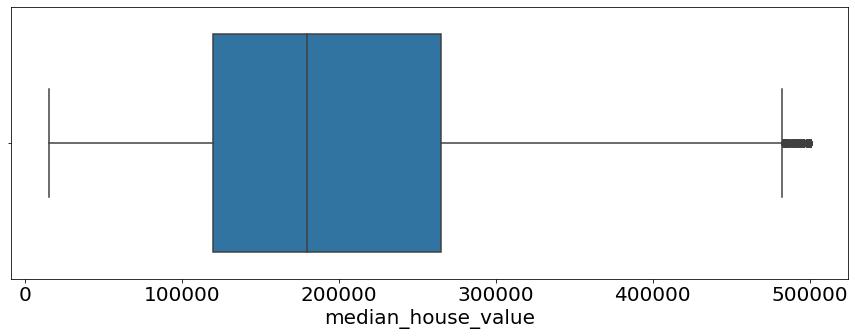

In [39]:
import seaborn as sns
ax = sns.boxplot(x='median_house_value', data=df)
ax;

**Observação em relação ao Gráfico:**<br>
* No gráfico acima podemos visualizar a distribuição da renda média de famílias dentro de uma casa. 
* O quadrado azul nos mostra a distribuição dos dados entre primeiro quartil (Q1), mediana e terceiro quartil (Q3). 
* Os traços afastados da caixa azul são os valores mínimo e máximo, e os pontos abaixo e acima do mínimo, bem como o máximo são considerados outliers. 

Após fazer a análise do porquê desses outliers, veja se você precisar removê-los. Se for o caso, pode fazer dessa forma: 

In [16]:
df.shape

(20640, 11)

In [17]:
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)

IQR = Q3 - Q1

df[-( (df['median_house_value'] < (Q1 - 1.5 * IQR)) | (df['median_house_value'] > (Q3 + 1.5 * IQR)))]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.496124
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.170886
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.610526
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.374468
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.017857
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.259358
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.373333
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.076289
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.811736


### Parte 3.3: Binning

* Essa técnica é geralmente utilizada em dados numéricos e tem objetivo de separar os dados em conjuntos ou intervalos.<br><br>
* Considerando nosso exemplo, poderíamos transformar o preço das casas em categorias como Alto, Médio e Baixo.<br><br>

* O *binning* pode reduzir o desempenho do modelo mas vai evitar bastante *overfitting*, então é preciso fazer um balanço entre o quanto você vai perder de desempenho versus o quanto você vai reduzir de *overfitting*. Sem contar que você pode acabar perdendo muita informação nesse processo, então, novamente, é preciso conhecer muito a área de negócios para entender se o *binning* vai valer a pena.

In [18]:
# Criar uma nova feature e transformar dados numéricos em dados categóricos
df['house_price_bin'] = pd.qcut(df['median_house_value'], 
                                q=[0, 1/3, 2/3, 1],
                                labels=['Baixo','Medio','Alto'])

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_bedrooms,house_price_bin
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.496124,Alto
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.170886,Alto
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.610526,Alto
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.374468,Alto
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.017857,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.259358,Baixo
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.373333,Baixo
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.076289,Baixo
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.811736,Baixo


In [20]:
df['house_price_bin'].unique()

['Alto', 'Medio', 'Baixo']
Categories (3, object): ['Baixo' < 'Medio' < 'Alto']

### Parte 3.4: One-hot encoding

* O **one-hot encoding** é usado para transformar variáveis categóricas em colunas e atribuir valores 0 e 1 para os valores dessas colunas, ou seja, é uma técnica de pré-processamento de dados que converte variáveis categóricas em binários.<br><br>
* O $0$ é usado para quando um registro não possui aquele valor, e 1 para quando ele tem aquele valor.<br><br> 

* O objetivo do **one-hot encoding** é deixar os dados mais entendíveis para os algoritmos, já que as máquinas entendem $0$'s e $1$'s.

<img src="imagens/transformationFeatures_02.png">

<img src="imagens/transformationFeatures_03.png">

In [21]:
encoded_ocean_proximity = pd.get_dummies(df['ocean_proximity'])

In [22]:
df.join(encoded_ocean_proximity).drop('ocean_proximity', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_bedrooms,house_price_bin,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.496124,Alto,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.170886,Alto,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2.610526,Alto,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2.374468,Alto,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.017857,Alto,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.259358,Baixo,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.373333,Baixo,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.076289,Baixo,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.811736,Baixo,0,1,0,0,0


In [23]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

* No exemplo acima, alteramos nossa variável de proximidade com o oceano, e todas as opções desta *feature* viraram uma coluna.<br><br>
* Nos registros onde a proximidade com o oceano era próximo da baía (*near bay*) essa coluna recebeu $1$ e as outras opções de proximidade receberam $0$.

# Parte 4: Redução de Dimensionalidade

Quando falamos em **redução de dimensionalidade**, o que se deseja obter é uma representação compacta para os dados observados que **preserve a maior parte da informação ou da estrutura** que os dados possuem no espaço original.

Por que é, de fato, útil reduzir a dimensionalidade?

Por conta da **Maldição da Dimensionalidade**. Richard E. Bellman utilizou esta expressão, em seu trabalho sobre programação dinâmica (1957), quando se referindo a vários fenômenos que surgem quando analisamos dados em espaços de alta dimensão.

A maldição da dimensionalidade implica em:

* Crescimento exponencial no número de exemplos necessários para manter uma determinada densidade de amostras.

* Crescimento da complexidade da função objetivo envolvida no processo de aprendizado.

* Tratamento estatístico em espaços de dimensão mais elevada: a distribuição Gaussiana admite uma extensão para este caso com uma parametrização relativamente simples; contudo, não há tantas opções quanto no caso unidimensional.

### Vantagens

* Reduzir o custo computacional envolvido no processamento dos dados.

* Eliminar redundâncias nas informações disponíveis.

* Possibilitar a visualização dos dados.

A Redução de Dimensionalidade apoia-se no conceito de **Variáveis Latentes**:

O conteito de **variáveis latentes** estão relacionados aos atributos que estavam escondidos em meio aos dados.

Em outras palavras:

Ao aplicarmos uma técnica em um conjunto de dados $\mathbf{x} \in \mathbb{R}^{K \times 1}$, onde $1 < i < K$, obteremos na saída $\mathbf{y} \in \mathbb{R}^{M \times 1}$, onde $M < K$.

Reparem, o conjunto de entrada é dado por $\mathbf{x} \in \mathbb{R}^{K \times 1}$ e a saída $\mathbf{y} \in \mathbb{R}^{M \times 1}$. Os conjuntos $\mathbf{x}$ e $\mathbf{y}$ são diferentes. Isto significa que podemos dizer que houve uma transformação dos dados originais para aquele que obtivemos após a redução de dimensionalidade. Por isso precisamos destacar a diferença entre dois conceitos muito importantes: **seleção de features** e **extração de features**.

* **Seleção de Features:** do conjunto de atributos originais do dado, somente um subconjunto deles é selecionado para fazer parte da análise.

* **Extração de Features:** os dados originais sofrem algum tipo de transformação (e.g., projeção linear ou não-linear), dando origem a novos atributos em um espaço de dimensão possivelmente diferente.

## Parte 4.1: Seleção de Features

<img src="imagens/selectionFeatures.png">

Ao final da transformação das features, é preciso escolher quais delas vão para o modelo, pois às vezes possuímos recursos demais e o modelo de previsão não vai conseguir aguentar todas as variáveis possíveis, ou o tempo de treinamento do modelo vai aumentar muito. 

* Passar todas as features para o modelo pode fazer ele considerar relações que não existem e, até mesmo, considerar uma *feature* como mais importante do que ela realmente é.<br><br>
* Por exemplo, se você tem uma grande quantidade de dados, algumas coincidências podem ter ocorrido e ficaram guardadas nos dados, e a máquina pode acabar considerando isso como uma regra com baixa correlação.

#### Existem várias técnicas de seleção de recursos disponíveis, incluindo:

* **Seleção univariada:**<br>
Seleciona as características com base em estatísticas univariadas, como o teste qui-quadrado ou o teste F. Isso pode ser útil para eliminar rapidamente recursos irrelevantes ou redundantes.<br><br>

* **Seleção baseada em modelo:** <br>
Usa um modelo de aprendizado de máquina para avaliar a importância de cada recurso. As características menos importantes são removidas e o modelo é treinado novamente com as características restantes.<br><br>

* **Seleção de features recursivas:** <br>
Começa com um modelo que usa todas as características e, em seguida, remove recursivamente as características menos importantes, até que um conjunto ideal de características seja alcançado.<br><br>

* **Métodos de incorporação de recursos:** <br>
Incluem técnicas como redes neurais profundas e árvores de decisão, que podem incorporar automaticamente a seleção de recursos durante o processo de treinamento do modelo.

**Seleção de Features:**

1) Modelos Não-supervisionados: Uso de correlação para eliminação de variáveis redundantes.

2) Modelos Supervisionados: Remoção de variáveis irrelevantes através de técnicas específicas.
* Wrapper: Busca o melhor sub-conjunto de *features* para alcançar melhor desempenho. Exemplo: *Recursive Feature Elimination* (RFE).
* Filtros: Seleciona o melhor sub-conjunto de *features* baseado na relação estatística que apresentam com a variável *target*. Exemplos: Modelos estatísticos e Métodos de Importância de *Features*.
* Intrínscecos: São algorítmos que realizam a seleção de *features* automaticamente durante a etapa de treinamento. Exemplo: Árvores de Decisão.

### Exemplo Baseado em Variância

In [48]:
from sklearn.datasets import load_iris

# Carrega o conjunto de dados
iris = load_iris()
X, y = iris.data, iris.target

In [49]:
from sklearn.feature_selection import VarianceThreshold

# Estabelecendo o limiar de variancia
limiar_de_variancia = 0.6

# Criando o modelo de selecao
selecao = VarianceThreshold(threshold = limiar_de_variancia)

# Selecionando as features
features_selecionadas = selecao.fit_transform(iris['data'])

# Verificando a estrutura dos dados selecionados
print("Formato dos dados Originais:", np.shape(iris['data']))
print("Formato dos dados após a seleção de features:", np.shape(features_selecionadas))

Formato dos dados Originais: (150, 4)
Formato dos dados após a seleção de features: (150, 2)


### Parte 4.1.1. Seleção Univariada

### Chi-quadrado

O teste chi-quadrado é usado em estatística para testar a independência de dois eventos. Considerando os dados de duas variáveis, podemos obter a contagem observada O e a contagem esperada E. O chi-quadrado mede como a contagem esperada E e a contagem observada O se desviam uma da outra.

$$
x_{c}^{2} = \sum_{i=0}^{N-1} \frac{(O_{i} - E_{i})^{2}}{E_{i}},
$$

onde:

* $c$: Número de graus de liberdade;

* $O$: Valores observados (preditos);

* $E$: Valores esperados (reais).

Quando dois recursos são independentes, a contagem observada se aproxima da contagem esperada e, portanto, teremos um valor de qui-quadrado menor. Portanto, um valor alto de chi-quadrado indica que a hipótese de independência está incorreta. Simplificando, quanto maior o valor de chi-quadrado, o recurso é mais dependente da resposta e pode ser selecionado para o treinamento do modelo.

**Etapas para realizar o teste chi-quadrado:**

1. Definir Hipótese.

2. Criar uma tabela de contingência.

3. Encontrar os valores esperados.

4. Calcular o valor de chi-quadrado.

5. Aceitar ou rejeitar a hipótese nula.

1. **Definir Hipótese:**

* Hipótese nula ($H_{0}$): Duas variáveis são independentes.

* Hipótese alternativa ($H_{1}$): Duas variáveis não são independentes.

2. **Criar uma tabela de contingência:**

Uma tabela que mostra a distribuição de uma variável em linhas e outra em colunas. É usada para estudar a relação entre duas variáveis.

Os graus de liberdade da tabela de contingência são dados como $(r-1) * (c-1)$, onde $r$ e $c$ são linhas e colunas.

3. **Encontrar os valores esperados:**

Com base na hipótese nula de que as duas variáveis são independentes. Podemos dizer que se A e B são dois eventos independentes:

$$
\text{P}(\text{A} \cap \text{B}) = \text{P}(\text{A}) \ast \text{P}(\text{B})
$$

4. **Calcular o valor de chi-quadrado:**

Resumir os valores observados e os valores esperados calculados em uma tabela e determinar o valor do qui-quadrado através de:

$$
x_{c}^{2} = \sum_{i=0}^{N-1} \frac{(O_{i} - E_{i})^{2}}{E_{i}},
$$

5. **Aceitar ou rejeitar a hipótese nula:**

Verificar se o valor calculado do chi-quadrado está na região de aceitação ou rejeição, através da tabela de chi-quadrado. Neste caso, se estabelece o valor de um parâmetro $\alpha$ e verifica-se o resultado com base no grau de liberdade calculado na tabela de contingência. Caso o dado caia na região de rejeição, a hipótese $H_{0}$ é rejeitada e a *feature* não é selecionada para a sequência da tarefa.

In [24]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Carrega o conjunto de dados
iris = load_iris()
X, y = iris.data, iris.target

In [25]:
X.shape

(150, 4)

In [26]:
# Seleciona as 2 melhores características usando a estatística qui-quadrado
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [27]:
# Exibe as características selecionadas
print(X_new.shape)

(150, 2)


### Parte 4.1.2. Seleção baseada em modelo

Uma abordagem comum para seleção de características, onde um modelo preditivo é construído e as características são selecionadas com base na importância atribuída a elas pelo modelo.

### Construção do modelo preditivo:

O primeiro passo dos métodos baseados em modelos é construir um modelo preditivo utilizando um algoritmo adequado. Algoritmos populares incluem Árvores de Decisão, Random Forest e Gradient Boosting Machine. Esses algoritmos são conhecidos por sua capacidade de aprender padrões complexos nos dados e gerar modelos preditivos de alta qualidade.

### Treinamento do modelo:

O próximo passo é treinar o modelo preditivo usando um conjunto de dados de treinamento. O algoritmo ajusta os parâmetros do modelo com base nos dados de treinamento, tentando encontrar a melhor maneira de prever a variável de interesse com base nas características fornecidas. Durante o treinamento, o algoritmo examina as diferentes combinações de características e seus valores para encontrar os padrões que melhor explicam a variabilidade nos dados.

### Importância das características:

Uma vez que o modelo esteja treinado, é possível avaliar a importância das características usadas para fazer as previsões. Cada algoritmo possui sua própria maneira de calcular a importância das características, mas a ideia geral é determinar quais características têm maior influência nas previsões do modelo.

 - **Árvores de Decisão**: Uma árvore de decisão divide os dados com base nas características, criando ramos que representam diferentes combinações de valores das características. A importância de uma característica pode ser medida pela redução da impureza nos dados ao dividir as amostras com base nessa característica. Quanto maior a redução da impureza, maior é a importância da característica.
 
 
 - **Random Forest**: Uma Random Forest é uma coleção de várias árvores de decisão. A importância de uma característica em uma Random Forest é calculada pela média da importância da característica em cada árvore individual.

  - **Gradient Boosting Machine**: O Gradient Boosting é um método de aprendizado de máquina que também usa árvores de decisão como componentes básicos. A importância das características é calculada com base na contribuição de cada característica para a redução da função de perda durante o processo de otimização do modelo.

### Seleção das características:

Uma vez que as importâncias das características são obtidas, é possível selecionar as mais relevantes para a tarefa em questão. Isso pode ser feito de várias maneiras, dependendo dos critérios e restrições específicos. Alguns métodos comuns incluem:

- **Definir um limiar**: As características com uma importância acima de um determinado limiar são selecionadas, enquanto as demais são descartadas.
- **Seleção das melhores $K$ colunas**: As $K$ características com a maior importância são selecionadas.
- **Seleção iterativa**: Começando com um conjunto inicial de características, as características são adicionadas ou removidas iterativamente com base em sua importância até que um critério de parada seja atingido.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris
import numpy as np

# Carregar o conjunto de dados
data = load_iris()
X = data.data
y = data.target

# Criar o modelo de Floresta Aleatória
model = RandomForestClassifier()

# Realizar a seleção de características baseada no modelo
sfm = SelectFromModel(model)
X_new = sfm.fit_transform(X, y)

In [29]:
# Obter as características selecionadas
selected_features = np.array(data.feature_names)[sfm.get_support()]

# Exibir as características selecionadas
print("Características selecionadas:")
print(selected_features)

Características selecionadas:
['petal length (cm)' 'petal width (cm)']


### Parte 4.1.3. Seleção de features recursivas

### ***Recursive Feature Elimination* (RFE)**

O RFE é um método simples e comum para selecionar as melhores features para construção de modelos. Dado um modelo que atribui pesos às features, o objetivo da Recursive Feature Elimination (RFE) é selecionar as features considerando recursivamente conjuntos cada vez menores de features. Primeiro, o modelo é treinado no conjunto inicial de features e a importância de cada uma é obtida através de qualquer atributo específico. Em seguida, as features menos importantes são removidas do conjunto original. Esse procedimento é repetido recursivamente no dataset até que o número desejado de características a serem selecionadas seja obtido.

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Gerando um conjunto de dados de exemplo
X, y = make_classification(n_samples=100, n_features=10, random_state=0)

# Criando um estimador/modelo
estimator = LogisticRegression()

# Criando o seletor de features RFE
rfe = RFE(estimator, n_features_to_select=5)

# Realizando a seleção de features
X_selected = rfe.fit_transform(X, y)

In [31]:
# Obtendo as features selecionadas
selected_features = rfe.support_
feature_ranking = rfe.ranking_

print("Features selecionadas:")
for feature, selected in enumerate(selected_features):
    if selected:
        print(f"Feature {feature+1}")

print("\nRanking das features:")
for feature, rank in enumerate(feature_ranking):
    print(f"Feature {feature+1}: {rank}")

Features selecionadas:
Feature 3
Feature 7
Feature 8
Feature 9
Feature 10

Ranking das features:
Feature 1: 5
Feature 2: 3
Feature 3: 1
Feature 4: 2
Feature 5: 6
Feature 6: 4
Feature 7: 1
Feature 8: 1
Feature 9: 1
Feature 10: 1


# 4.2. Extração de Features 

Existem várias técnicas que podem ser utilizadas para realizar a redução de características, sendo as mais comuns: 
- Análise de Componentes Principais (PCA)
- *t-distributed Stochastic Neighbor Embedding* (t-SNE)
- Análise Discriminante Linear (LDA)
- Fatoração de Matriz Não-Negativa (NMF), entre outras.

### Análise de Componentes Principais

A análise de componentes principais é uma técnica amplamente utilizada para redução de dimensionalidade, compressão de dados (com perda), extração de atributos e visualização de dados.

Formulações possíveis para a PCA:

* **Mínimo Erro de Reconstrução:** Encontrar a projeção linear dos dados em um espaço de dimensão reduzida $M < K$ que faça com que o erro quadrático médio de reconstrução seja minimizado.

* **Máxima Variância:** Encontrar a projeção linear dos dados em um espaço de dimensão reduzida $M < K$ que faça com que as variáveis obtidas, denominadas de componentes principais (ou, simplesmente, features) possuam máxima variância (energia).

Como funciona a PCA:

1) Centraliza-se a matriz $\mathbf{X}$, isso significa: $\text{E}\{\mathbf{X}\} = 0$, onde $\mathbf{X} \in \mathbb{R}^{N \times K}$;

2) Calcula-se a matriz de covariância $\mathbf{C}$;

3) Autodecomposição de $\mathbf{C}$ em autovalores e autovetores;

4) Seleção das colunas de autovetores seguindo o número de componentes principais, através de uma metodologia definida para isso. Exemplos: *Elbow Method* e Taxa de Contribuição Acumulativa (ACR);

5) Obtenção da matriz $\mathbf{P}$ de dimensão reduzida, através de: $\mathbf{P} = \mathbf{A}^{T}_{m} \cdot \mathbf{C}$. Onde $\mathbf{A}$ corresponde à matriz de autovetores e $\cdot^{T}$ indica a matriz transposta.

In [40]:
# Importando o dataset 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Carregando os dados
iris = load_iris()

df2 = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns = iris['feature_names'] + ['target'])
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [36]:
params = {'legend.fontsize': 20,
          'figure.figsize': (15,5),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20}

In [41]:
# Importando a PCA
from sklearn.decomposition import PCA

# Criando o modelo através de um número definido de componentes principais
pca = PCA(n_components = 2)

# Aplicando a PCA
P = pca.fit_transform(iris['data'])

print(P)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

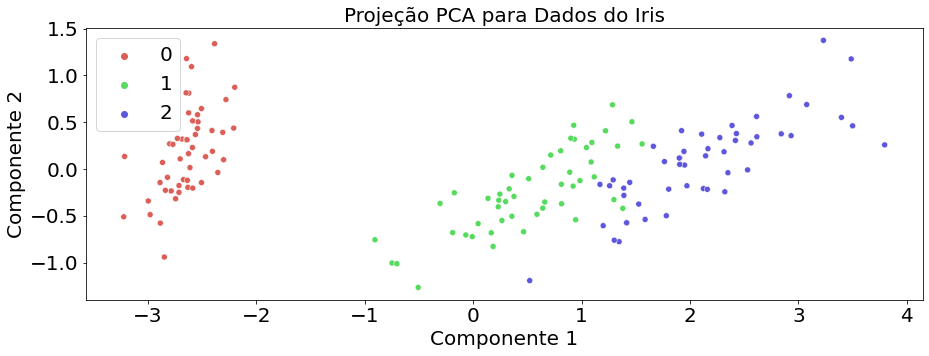

In [42]:
y = iris.target

df3 = pd.DataFrame()
df3["y"] = y
df3["Componente 1"] = P[:,0]
df3["Componente 2"] = P[:,1]

sns.scatterplot(x = "Componente 1", y = "Componente 2", hue = df3.y.tolist(),
                palette = sns.color_palette("hls", 3),
                data = df3).set(title = "Projeção PCA para Dados do Iris") 
plt.show()

**Seleção do Número de Componentes Principais**

Existem alguns métodos que estabelecem o número de componentes principais através da porcentagem de variância que define a quantidade de informação que deve ser mantida na execução do problema. A porcentagem de variância pode variar de acordo com a literatura, mas normalmente é estabelecidade entre $95\%$ a $99\%$. Para se fazer esta escolha no *sklearn*, devemos:

In [45]:
# Importando a PCA
from sklearn.decomposition import PCA

# Criando o modelo através de um número de componentes principais definido pela porcentagem de variancia
pca = PCA(n_components = 0.95)

# Aplicando a PCA
P = pca.fit_transform(iris['data'])

print(P)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

### t-SNE

É uma ferramenta para **visualizar** dados de alta dimensão. O T-SNE, baseado na incorporação estocástica de vizinhos, é uma técnica de redução de dimensionalidade não linear para visualizar dados em um espaço bi ou tridimensional. Foi desenvolvido por Laurens van der Maaten e Geoffrey Hinton.

Características:

1. Um algoritmo randomizado e não supervisionado, usado apenas para visualização;

2. Aplica uma técnica de **redução de dimensionalidade** não linear, onde o foco está em manter os **pontos de dados muito semelhantes próximos no espaço de dimensão inferior**;

3. Preserva a estrutura local dos dados usando a distribuição t de Student para calcular a similaridade entre dois pontos no espaço de dimensão inferior;

4. O t-SNE usa uma distribuição de Student-t de cauda pesada para calcular a similaridade entre dois pontos no espaço de baixa dimensão, em vez de uma distribuição gaussiana, que ajuda a resolver os problemas de aglomeração e otimização;

5. **Não é afetado por outliers**.

Funcionamento:

1. Busca encontrar a similaridade entre dois pontos próximos em um espaço dimensão superior.

2. Mapeia cada ponto no espaço de dimensão superior para um mapa em dimensão reduzida com base na semelhança de pares de pontos no espaço de dimensão superior.

3. Encontra uma representação de dados de baixa dimensão que minimize a incompatibilidade entre padrões usando gradiente descendente com base na divergência de Kullback-Leibler.

4. Usa a distribuição $t$-Student para calcular a similaridade entre dois pontos no espaço de dimensão reduzida.

### Exemplo

Vamos aplicar o t-SNE no Iris dataset.

In [46]:
# Importando o t-SNE
from sklearn.manifold import TSNE

# Separando os dados
x = iris.data
y = iris.target

# Criando o modelo do t-SNE 
tsne = TSNE(n_components = 2, verbose = 1, random_state = 0)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.525864
[t-SNE] KL divergence after 1000 iterations: 0.125683


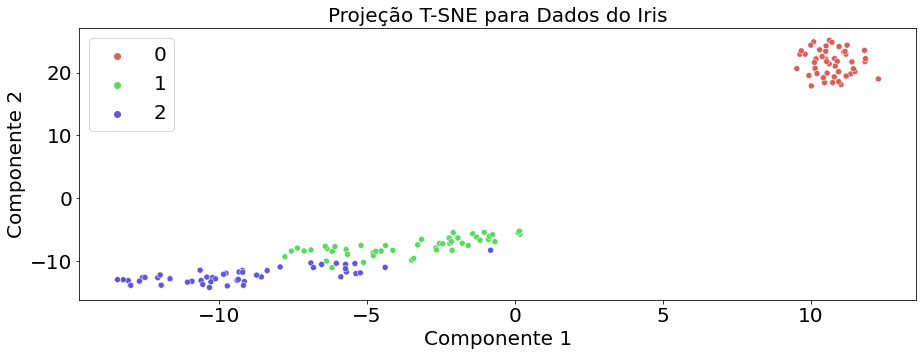

In [47]:
df4 = pd.DataFrame()
df4["y"] = y
df4["Componente 1"] = z[:,0]
df4["Componente 2"] = z[:,1]

sns.scatterplot(x = "Componente 1", y = "Componente 2", hue = df4.y.tolist(),
                palette = sns.color_palette("hls", 3),
                data = df4).set(title = "Projeção T-SNE para Dados do Iris") 
plt.show()

### Análise Discriminante Linear (LDA):

A LDA é uma técnica que busca encontrar uma combinação linear das características originais que maximize a separação entre diferentes classes ou categorias dos dados. 

Diferentemente do PCA, que é uma técnica não supervisionada, a LDA leva em consideração as classes dos dados para realizar a redução de características. 

O objetivo é encontrar um subespaço de características onde as diferentes classes estejam bem separadas, o que pode ser útil em problemas de classificação.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Carrega o conjunto de dados
iris = load_iris()
X, y = iris.data, iris.target

# Aplicando a LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

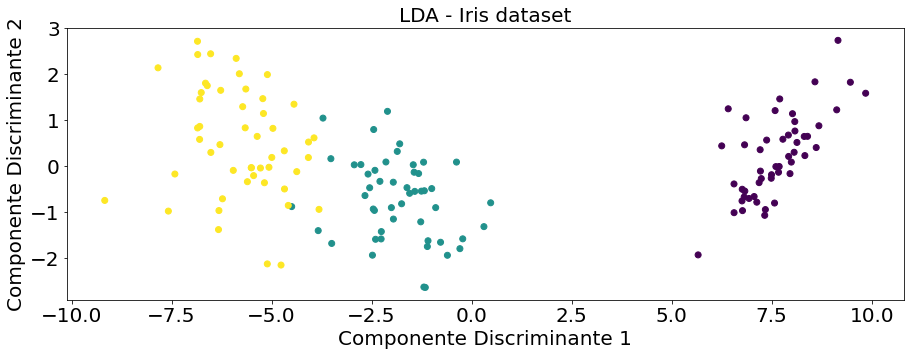

In [37]:
# Plotando as duas primeiras componentes discriminantes
pylab.rcParams.update(params)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Componente Discriminante 2')
plt.title('LDA - Iris dataset')
plt.show()

### Fatoração de Matriz Não-Negativa (NMF):

A NMF é uma técnica que busca representar uma matriz de dados não negativos como o produto de duas matrizes não negativas de menor dimensão. 

Essa técnica é amplamente utilizada para a extração de características em dados, como imagens, áudio e texto. 

Através da NMF, é possível encontrar uma representação mais compacta dos dados, mantendo as características mais relevantes.

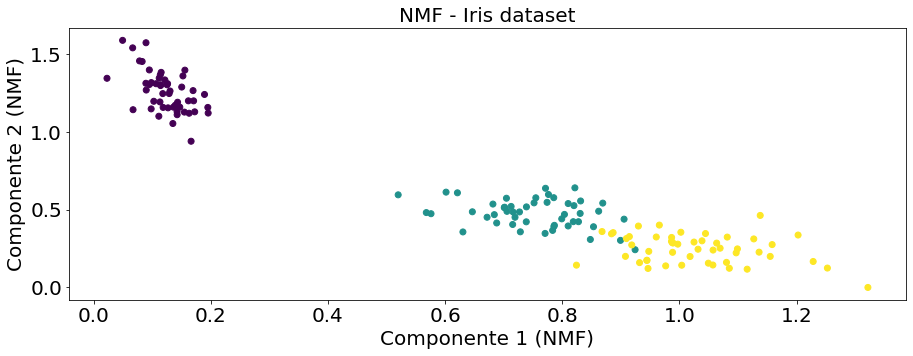

In [38]:
from sklearn.decomposition import NMF

# Aplicando a NMF
nmf = NMF(n_components=2, max_iter=500)
X_nmf = nmf.fit_transform(X)

# Plotando as duas primeiras componentes da NMF
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=y)
plt.xlabel('Componente 1 (NMF)')
plt.ylabel('Componente 2 (NMF)')
plt.title('NMF - Iris dataset')
plt.show()